# Задание Т1. Евграфов Михаил. Б03-913С2

Случайная величина имеет экспоненциальный закон распределения:

$ \begin{equation*}
p(x) = 
 \begin{cases}
   e^{-x} &\text{, $ x \geq 0 $}\\
   0 &\text{, $ x < 0 $}
 \end{cases}
\end{equation*}
$

Объём выборки: $ N = 25 $

**Используемые пакеты:**

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import random as rd
import pandas as pd
import numpy as np

**Константы:**

In [2]:
length = 12.8 # Длина изображений в дюймах
width = 9.6   # Ширина изображений в дюймах
lambd = 1     # Среднее значение
bootsN = 1000 # Количество подвыборок для bootstrap.
N = 25        # Объём выборки

**Вспомогательные функции:**

In [3]:
def generate_exponential_sample(size, lambd):
    """
    Эта функция генерирует выборку для экспоненциального
    закона распределения
    
    :параметр: size - объём выборки
    :параметр: lambd - среднее значение
    
    :return: pd.DataFrame
    """
    
    sample = {'sample' : [rd.expovariate(lambd) for i in range(size)]}
    
    return pd.DataFrame(data=sample)

In [4]:
def generate_subsample(sample, size):
    """
    Эта функция генерирует подвыборку для заданной
    выборки
    
    :параметр: sample - выборка
    :параметр: size - объём подвыборки
    
    :return: np.array
    """
    
    subsample = [rd.choice(sample) for i in range(size)]
    
    return np.array(subsample)

In [5]:
def generate_bootstrap_sample(sample, stat, size):
    
    """
    Эта функция генерирует выборку для заданной статистики,
    используя метод bootstrap
    
    :параметр: sample - выборка
    :параметр: stat - функция для расчёта статистики
    :параметр: size - объём итоговой выборки
    
    :return: pd.DataFrame
    """
    
    boots_sample = []
    
    for i in range(size):
        
        subsample = generate_subsample(sample, len(sample))
        boots_sample.append(stat(subsample))
        
    return pd.DataFrame(data={'sample' : boots_sample})

In [6]:
def visualize_boxplot_from_df(df, column):
    """
    Эта функция рисует boxplot
    
    :параметр: df - таблица с данными pd.DataFrame
    :параметр: column - название колонки, для 
                        которой будет построен boxplot
    
    :return: ничего не возвращает
    
    """
    fig, ax = plt.subplots(figsize=(length, width))

    sns.boxplot(df.loc[:, column], linewidth=2.5, width=.2, 
                color='pink', saturation=0.5, fliersize=10)

    plt.title('Boxplot T1', fontsize=17,  fontweight='bold')
    plt.xlabel('Sample', fontsize=12, fontweight='bold')
    plt.grid()

    plt.show()

In [7]:
def visualize_edf_from_df(df, column):
    """
    Эта функция рисует эмпирическую функцию распределения
    
    :параметр: df - таблица с данными pd.DataFrame
    :параметр: column - название колонки, для 
                        которой будет построена edf
                        
    :return: ничего не возвращает
    
    """
    
    freq = df.loc[:, column].value_counts(normalize=True).to_numpy()
    prob = np.cumsum(freq)
    
    edf = df.assign(probability=prob)
    edf.plot(x='sample', y='probability', drawstyle='steps', figsize=(length, width), 
             xlim=0, ylim=[0, 1], color='k', grid=True)
    
    plt.title('Empirical Distribution Function', fontsize=17,  fontweight='bold')
    plt.xlabel('Sample', fontsize=12, fontweight='bold')
    
    plt.show()

In [8]:
def visualize_hist_from_df(df, col):
    """
    Эта функция рисует гистограмму
    
    :параметр: df - таблица с данными pd.DataFrame
    :параметр: column - название колонки, для 
                        которой будет построена гистограмма
                        
    :return: ничего не возвращает
    
    """
    
    k = 1 + int(round(np.log2(df.shape[0])))
    
    df[[col]].hist(bins=k, figsize=(length, width))
    
    plt.title('Histogram', fontsize=17,  fontweight='bold')
    
    plt.show()

In [9]:
def calculate_normal_distribution(mean=0, disp=1):
    """
    Эта функция считает нормальное распределение
    
    :параметр: mean - математическое ожидание
    :параметр: disp - дисперсия
    
    :return: np.arrays - значения по x и y
    
    """
    
    try:
        x = np.linspace(-10, 10, 10000)
        
        y = np.exp((-1) * (x - mean) ** 2 / (2 * disp))
        y = y / (np.sqrt(disp * 2 * np.pi))
        
        return x, y
    
    except ZeroDivisionError:
        print('ZeroDivisionError: disp = 0')

In [10]:
def visualize_normal_distribution(mean=0, disp=1):
    """
    Эта функция рисует нормальное распределение
    
    :параметр: mean - математическое ожидание
    :параметр: disp - дисперсия
    
    :return: ничего не возвращает
    
    """
    
    x, y = calculate_normal_distribution(mean, disp)
    
    fig, ax = plt.subplots(figsize=(length, width))
    
    ax.plot(x, y, color='b', label=f'd = {round(disp, 2)}, <x> = {round(mean, 2)}')
    
    ax.set_title('Normal Distribution', fontsize=20, fontweight='bold')
    ax.set_xlabel('Amount', fontsize=11, fontweight='bold')
    ax.set_xlim(x.min(), x.max())
    ax.set_xticks(np.linspace(-10, 10, 11))
        
    ax.legend()
    ax.grid()

## Пункт 0. Генерации выборки и получение вариационного ряда.

In [11]:
sample = generate_exponential_sample(N, lambd) # выборка
row = sample.sort_values(by=['sample'])        # вариационный ряд

## Пункт 1. Анализ вариационного ряда.

**Задание**: определить моду, медиану, размах, коэффициент асимметрии.

Непосредственно, вариационный ряд: 

In [12]:
row

,sample
18,0.010549
8,0.143237
0,0.161263
22,0.235398
11,0.249374
6,0.254925
15,0.286301
12,0.322800
9,0.386682
17,0.419880


In [13]:
row_describe = row.describe()

### Определение моды:

In [14]:
row.mode()

,sample
0,0.010549
1,0.143237
2,0.161263
3,0.235398
4,0.249374
5,0.254925
6,0.286301
7,0.322800
8,0.386682
9,0.419880


**Вывод**: в выборке отсутствуют повторяющиеся элементы. 

### Определение медианы:

In [15]:
row.median()

sample    0.719867
dtype: float64

**Вывод**: $ med = 0.719867 $

### Определение размаха:

In [16]:
rng = row_describe.loc['max', 'sample'] - row_describe.loc['min', 'sample']

print(f'range = {round(rng, 3)}')

range = 3.11


**Вывод**: $ range \approx 3.11 $

### Определение коэффициента асимметрии:

In [17]:
arr = row.loc[:, 'sample'].to_numpy(dtype='float64')

skew = st.skew(arr, bias=True)
skew_correct = st.skew(arr, bias=False)

print(f'skew = {round(skew, 3)}')
print(f'skew_correct = {round(skew_correct, 3)}')

skew = 1.141
skew_correct = 1.216


**Выводы**:

1. $ \gamma = 1.141 $ - не нормированная величина
2. $ \gamma_n = 1.216 $ - нормированная величина
3. $ \gamma > 0 => $ перевес и "пологость" справа, что соответствует экспоненциальному закону

### Построение boxplot.

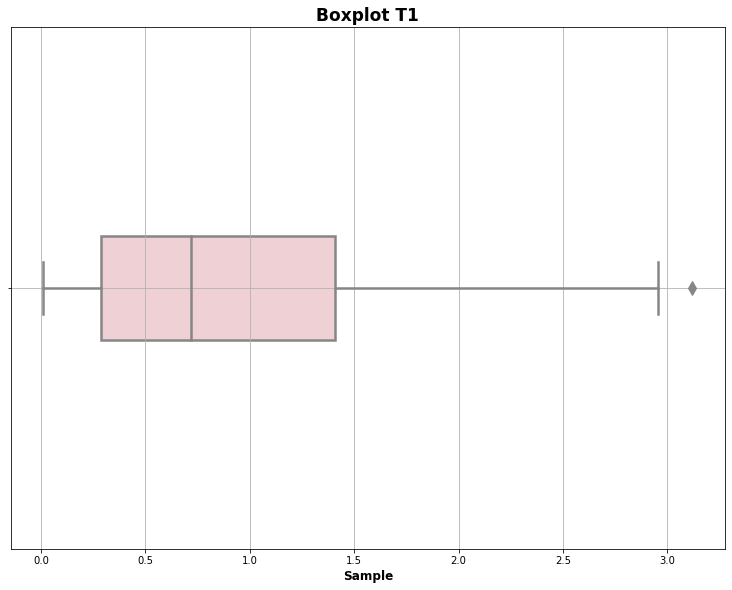

In [18]:
visualize_boxplot_from_df(row, 'sample')

## Пункт 2. Эмпирическая функция распределения и Гистограмма.

**Задание**: построить эмпирическую функцию распределения и гистограмму. 

### Построение эмпирической функции распределения.

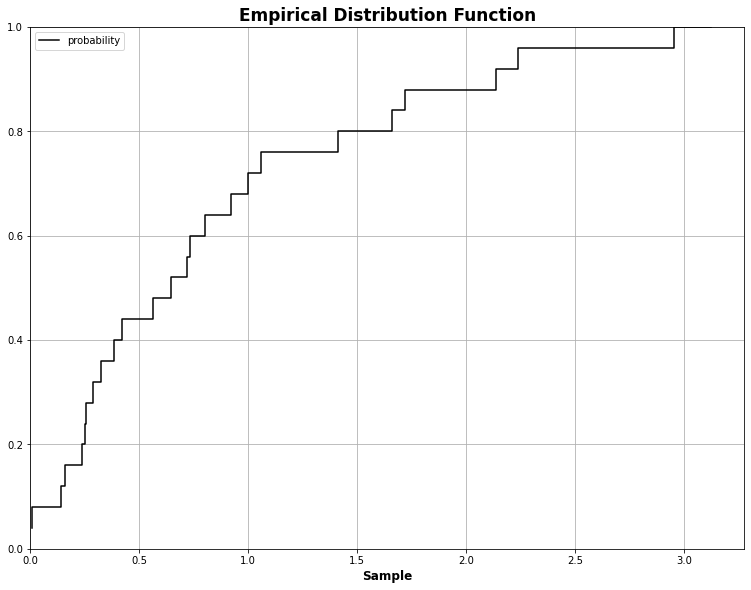

In [19]:
visualize_edf_from_df(row, 'sample')

### Построение гистограммы. 

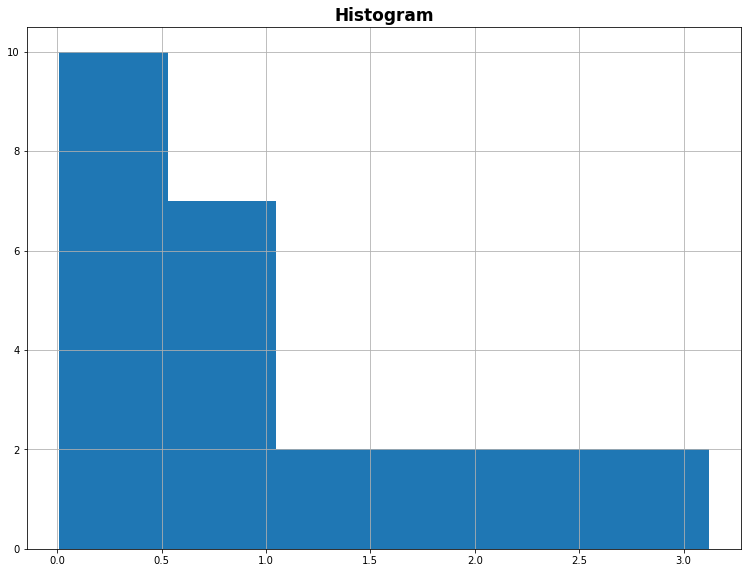

In [20]:
visualize_hist_from_df(row, 'sample')

*Примечание*: гистограмма отрисована в относительных единицах, необходима нормировка на $ \frac{1}{N\Delta_i} = 0.08 $.

## Пункт 4. Оценка плотности распределения среднего арифметического элементов.

**Задание**: определить плотность распределения среднего арифметического элементов выборки. Сравнить с бутстраповской оценкой плотности. 

### Определение плотности распределения. 

Из ЦПТ Ляпунова и асимптотической оценки $ => $ $ \overline{x} \sim N(M[\xi], \frac{D[\xi]}{n})$

Некоторые статистики вариационного ряда:

In [21]:
row_describe

,sample
count,25.000000
mean,0.966016
std,0.879280
min,0.010549
25%,0.286301
50%,0.719867
75%,1.410777
max,3.120732


In [22]:
mean = row_describe.loc['mean', 'sample']
sigma = row_describe.loc['std', 'sample']
disp = sigma ** 2 / row.shape[0]

print(f'Disp = {disp}', f'Mean = {mean}', sep='\n')

Disp = 0.030925362002356408
Mean = 0.9660156430417121


**Вывод**: $ \overline{x} \sim N(0.77, 0.03)$

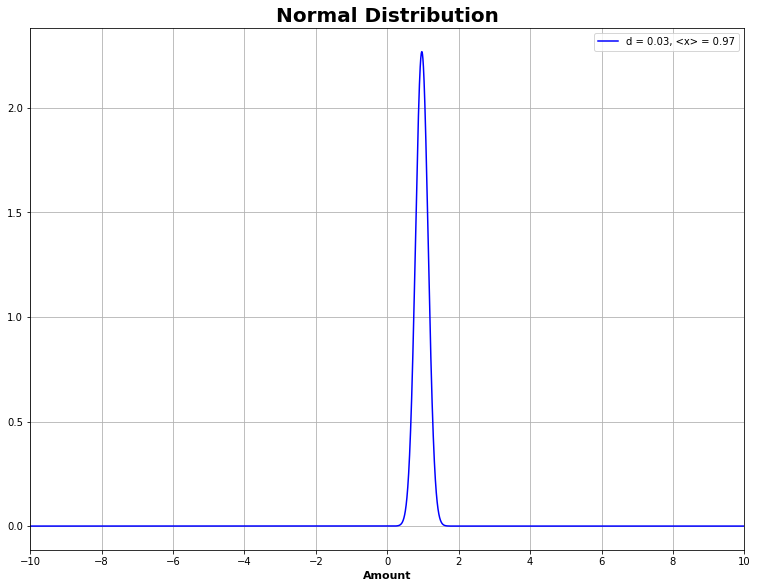

In [23]:
visualize_normal_distribution(mean, disp)

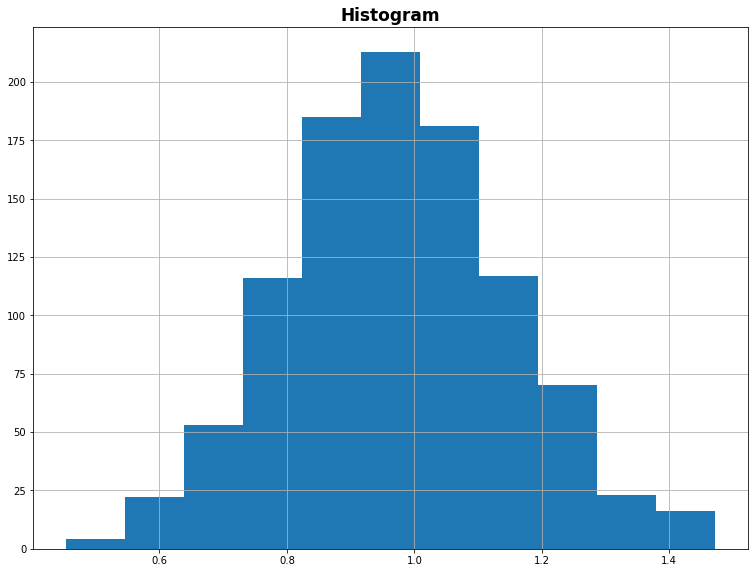

In [24]:
smpl = row.loc[:, 'sample'].to_numpy()

bt_mean = generate_bootstrap_sample(smpl, np.mean, bootsN)

visualize_hist_from_df(bt_mean, 'sample')

*Примечание*: гистограмма отрисована в относительных единицах, необходима домножение на $ \frac{1}{N\Delta_i} = 0.01 $.

## Пункт 5. Оценка плотности распределения коэффициента асимметрии.

**Задание**: найти bootstrap-оценку плотности распределения коэффициента асимметрии. 

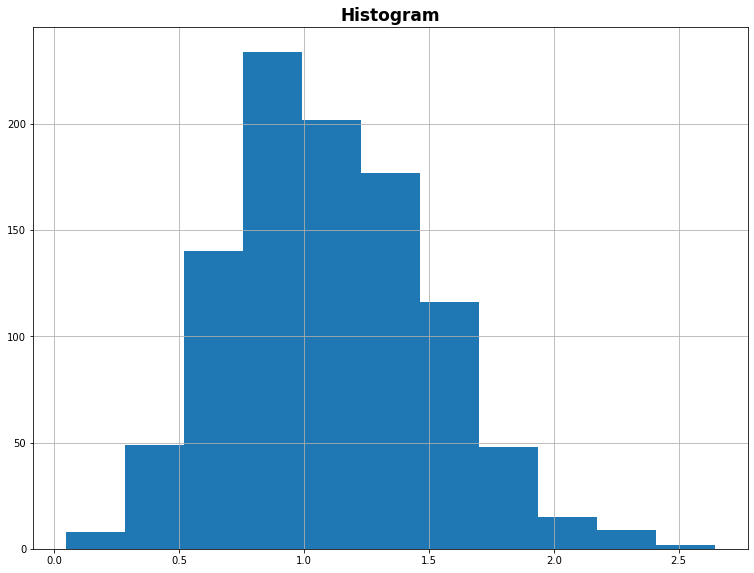

In [34]:
smpl = row.loc[:, 'sample'].to_numpy()

bt_skew = generate_bootstrap_sample(smpl, st.skew, bootsN)

visualize_hist_from_df(bt_skew, 'sample')

*Примечание*: гистограмма отрисована в относительных единицах, необходима домножение на $ \frac{1}{N\Delta_i} = 0.004 $.